## Project Programming for Data Analytics 2018

# Dataset Simulation

## Student ID G00219132
    
This notebook is a submission for Project 2018 for the Module **Programming for Data Analytics** The module is delivered as part of the [Higher Diploma in Data Analytics](https://www.gmit.ie/computing/higher-diploma-science-computing-data-analytics-ict-skills) in [Galway Mayo IT](https://www.gmit.ie/), Galway.

### problem statement outline
Below is an extract from the project instructions.

**Problem statement**

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – thedata set itself can simply be displayed in an output cell within the notebook.

*Note students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.*

### notebook structure
The notebook is split up into the following sections

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Details of chosen phenomenon 
* Section Three - the types of variables involved, their likely distributions, and their relationships with each other.
* Section Four - Synthesise/simulate a data set as closely matching their properties as possible.
* Section Five - ????????????????????/
* Section Six - references and conclusion

### Section one - general set up
programming language - Python 3.7.0.for some information about Python and it's uses see the wikipedia page, [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

python packages imported

* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org)
* NumPy [NumPy](http://www.numpy.org/)
* Seaborn [Seaborn](https://seaborn.pydata.org)
* Pandas [Pandas](https://pandas.pydata.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

### Section Two - Details of chosen phenomenon 

For this project I decided to build a dataset that would contain some synthesised student information, the information is based on some of the data gathered from Third Level Institutes by the Higher Education Authority [HEA](http://hea.ie/).
For some of the data variables I used statistics published by the HEA for the entry term 2016/17, [HEA Key Facts & figures 2016-17](http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf) and for others I used observations from my own workplace which I will explain and reference. 

There are many variables and many student types/cohorts and I have used some artistic licence to decide what to include, whilst I am primarily mirroring a Y1 Undergraduate entrants cohort I have added a few non standard stats for that cohort (for example part time and distance learners are typically a stat of total enrollments rather than UG Y1). 


### Section Three - the types of variables involved, their likely distributions, and their relationships with each other.

Gender - this is a categorical variable and the gender breakdown in 2016/17 for UG new entrants was 51% Female
and 49% Male. In 2016/17 gender had two possible values, male or female. From 2018/19 onwards the available values have been changed.

Mode of Study - this is a categorical variable, I have taken some artistic licence here and am applying a breakdown that belongs to total enrollments to my UG cohort (as otherwise all would be full time)




In [5]:
import numpy as np

building a student dataset to look at variables that might influence progression as reported by HEA[1]

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd

 ### Section Four - Synthesise/simulate a data set as closely matching their properties as possible.

In [32]:
CAO_ID =[]
i=(1)
while i<2000:
       # CAO_ID =[]
        C = np.random.randint(16000000, 16100000)
        if C not in CAO_ID:CAO_ID.append(C)
        i=i+1
        if len(CAO_ID)==1000:break
##print(CAO_ID)

len(CAO_ID)
##https://www.tutorialspoint.com/How-to-generate-non-repeating-random-numbers-in-Python

1000

In [17]:
M_F =np.random.choice (['male', 'female'], 1000, p =[0.49,0.51])
len(M_F)


1000

In [41]:
program_level = np.random.choice(['6', '7', '8'], 1000, p=[0.09, .41, .5])
len(program_level)
discipline =  np.random.choice(['Engineering', 'ict', 'science', 'other'], 1000, p=[0.22, 0.10, 0.12, 0.56])
len(discipline)

1000

In [33]:
Mode_of_Study = np.random.choice (['full time', 'part time','remote'], 1000, p =[0.8,0.17,0.03])
len(Mode_of_Study)

1000

In [19]:
pref =[]
for i in range (1,1001):
   # pref = (print(int(13**np.random.random())))
    p = (int(10**np.random.random()))
    pref.append(p)
    ## assume preference follows benfords law
#print (pref)
#print(i)
len(pref)

1000

In [25]:
cao = np.random.randint(32, 70, size=1000)
cao=cao*5
##print(cao)
len(cao)
##CAO = pd.DataFrame(cao)
# cao pts in stps of 5 in range 160-500
##CAO

1000

In [14]:
# below creates an array of random dates based on published student age profile for New Entrants SEP 2016
# Students born before 1st Jan 1993 would be classed as Mature, others as described as Not Mature by HEA
# Data Field MAT will be created alongside DOB

DOB =[]
MAT =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(40):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
    MAT.append("NOT_MATURE")
for i in range(340):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)
    MAT.append("NOT_MATURE")
for i in range(380): ##changed to 38 to allow for rounding in published %
    dob19 = random_date('1997-01-01', 200)
    DOB.append(dob19)
    MAT.append("NOT_MATURE")
for i in range(90):
    dob20 = random_date('1996-01-01', 200)
    DOB.append(dob20)
    MAT.append("NOT_MATURE")
for i in range(30):
    dob21 = random_date('1995-01-01', 200)
    DOB.append(dob21)
    MAT.append("NOT_MATURE")
for i in range(10):
    dob22 = random_date('1994-01-01', 200)
    DOB.append(dob22)
    MAT.append("NOT_MATURE")
for i in range(10):
    dob23 = random_date('1993-01-01', 200)
    DOB.append(dob23)
    MAT.append("MATURE")
for i in range(20):
    dob24 = random_date('1992-01-01', 200)
    DOB.append(dob24)
    MAT.append("MATURE")
for i in range(30):
    dob25_29 = random_date('1987-01-01', 1460)
    DOB.append(dob25_29)
    MAT.append("MATURE")
for i in range(50):
    dob30up = random_date('1941-01-01', 16425)
    DOB.append(dob30up)
    MAT.append ("MATURE")

         
        
##print (DOB)

#adapted from response to stackoverflow query[3]

In [15]:
Term =[]
for i in range(1000):
    Term.append("2016/2017")

In [111]:
##df = pd.DataFrame ()
df ["Term"]=Term
df ["CAO_ID"] = CAO_ID
df ["Study_Mode"] = Mode_of_Study
df ["pref"] = pref
df ["CAO"] = cao
df ["Gender"] = M_F
df ["Date of Birth"]=DOB
df ["Mature student"]= MAT
df ["level"]=program_level
df ["discipline"]=discipline
df ["CAO"] = cao
df

,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student,level,discipline
0,2016/2017,16028763,part time,2,345,female,1999-08-21,NOT_MATURE,7,ict
1,2016/2017,16038144,full time,2,180,female,2000-01-20,NOT_MATURE,7,other
2,2016/2017,16005996,full time,9,270,male,1999-01-08,NOT_MATURE,7,other
3,2016/2017,16066861,full time,2,255,female,2000-02-18,NOT_MATURE,7,Engineering
4,2016/2017,16058257,part time,2,340,male,2000-03-10,NOT_MATURE,8,Engineering
5,2016/2017,16096044,remote,1,230,male,2000-07-31,NOT_MATURE,8,other
6,2016/2017,16025360,part time,1,320,female,1999-03-30,NOT_MATURE,8,science
7,2016/2017,16041269,full time,4,280,female,1999-03-18,NOT_MATURE,7,other
8,2016/2017,16031341,full time,3,280,male,2000-02-18,NOT_MATURE,8,other
9,2016/2017,16084332,full time,3,275,male,2000-06-23,NOT_MATURE,7,ict


In [112]:
#progressed = []
for i in range (1,1001):
    p =  np.where((df['CAO']<250) & (df ["Gender"]=='male')& (df["Mature student"]=='NOT_MATURE')&((df["level"]=='6')|(df["level"]=='7'))&((df["discipline"]=='ict')|(df["discipline"]=='engineering')), 'at risk', 'OK')
   ## p =  np.where(df['CAO']>=300, 'yes', 'no')
    progressed.append(p)
##print (p)
##print (df["CAO"],df['Gender'],df["Study_Mode"])
##print(df['Gender'])
##print (df["Study_Mode"])
df.groupby(p).size()
##progressed.append(df['progressed'])
##print(df['progressed'])


## googled The truth value of a {0} is ambiguous 
##https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

OK         989
at risk     11
dtype: int64

In [113]:
df = pd.DataFrame ()
df ["Term"]=Term
df ["CAO_ID"] = CAO_ID
df ["Study_Mode"] = Mode_of_Study
df ["pref"] = pref
df ["CAO"] = cao
df ["Gender"] = M_F
df ["Date of Birth"]=DOB
df ["Mature student"]= MAT
df ["level"]=program_level
df ["discipine"]=discipline
df ["CAO"] = cao
df ["entry_risk_status"]=p
df.head(20)



,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student,level,discipine,entry_risk_status
0,2016/2017,16028763,part time,2,345,female,1999-08-21,NOT_MATURE,7,ict,OK
1,2016/2017,16038144,full time,2,180,female,2000-01-20,NOT_MATURE,7,other,OK
2,2016/2017,16005996,full time,9,270,male,1999-01-08,NOT_MATURE,7,other,OK
3,2016/2017,16066861,full time,2,255,female,2000-02-18,NOT_MATURE,7,Engineering,OK
4,2016/2017,16058257,part time,2,340,male,2000-03-10,NOT_MATURE,8,Engineering,OK
5,2016/2017,16096044,remote,1,230,male,2000-07-31,NOT_MATURE,8,other,OK
6,2016/2017,16025360,part time,1,320,female,1999-03-30,NOT_MATURE,8,science,OK
7,2016/2017,16041269,full time,4,280,female,1999-03-18,NOT_MATURE,7,other,OK
8,2016/2017,16031341,full time,3,280,male,2000-02-18,NOT_MATURE,8,other,OK
9,2016/2017,16084332,full time,3,275,male,2000-06-23,NOT_MATURE,7,ict,OK


In [120]:
##>>> data.groupby(['col1', 'col2']).mean()
df_at_risk = pd.DataFrame ()
df_at_risk = df.loc [(df['entry_risk_status']=='at risk')]
print(len(df_at_risk))
##temp_df = df_complete.ix[(df_complete['type'] == 'NDD') & 
                         ##(df_complete['writer'] == 'Mary') & 
                        ## (df_complete['status'] != '7'), ['col a','col c']]
df_at_risk

11


,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student,level,discipine,entry_risk_status
90,2016/2017,16015646,full time,4,165,male,1998-06-19,NOT_MATURE,7,ict,at risk
180,2016/2017,16027499,full time,9,160,male,1998-02-24,NOT_MATURE,7,ict,at risk
208,2016/2017,16003530,part time,5,245,male,1998-03-26,NOT_MATURE,7,ict,at risk
302,2016/2017,16049759,part time,2,170,male,1998-02-15,NOT_MATURE,7,ict,at risk
343,2016/2017,16074203,part time,1,170,male,1998-06-23,NOT_MATURE,7,ict,at risk
369,2016/2017,16073124,full time,7,240,male,1998-03-08,NOT_MATURE,6,ict,at risk
392,2016/2017,16045991,full time,7,240,male,1997-01-31,NOT_MATURE,7,ict,at risk
424,2016/2017,16072043,full time,1,170,male,1997-06-22,NOT_MATURE,7,ict,at risk
499,2016/2017,16092197,full time,3,160,male,1997-05-06,NOT_MATURE,7,ict,at risk
741,2016/2017,16098681,full time,3,160,male,1997-06-20,NOT_MATURE,7,ict,at risk


In [23]:
df.describe()
df.describe(include='all') 
import datetime
import sys
old_stdout = sys.stdout
sys.stdout = open('generalstats.txt', 'w')
print(df.describe())
print('\n'*2)
df.describe(include='all') 
print(df.describe(include='all'))
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))

sys.stdout = old_stdout
df.describe(include='all') 

# output to a csv adapted from code used for GMIT Programming & Scripting project 2018 [1] and
# trouble shooting assistance from a stackoverflow query responseto someone else's query[2]


,Term,CAO_ID,Study_Mode,pref,CAO,Gender,Date of Birth,Mature student,progressed
count,1000,1.000000e+03,1000,1000.000000,1000.000000,1000,1000,1000,1000
unique,1,NaN,3,NaN,NaN,2,599,2,2
top,2016/2017,NaN,full time,NaN,NaN,male,1998-03-22 00:00:00,NOT_MATURE,OK
freq,1000,NaN,791,NaN,NaN,504,7,890,762
first,NaN,NaN,NaN,NaN,NaN,NaN,1941-04-24 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-31 00:00:00,NaN,NaN
mean,NaN,1.605064e+07,NaN,3.429000,248.525000,NaN,NaN,NaN,NaN
std,NaN,2.906370e+04,NaN,2.524546,56.386868,NaN,NaN,NaN,NaN
min,NaN,1.600005e+07,NaN,1.000000,160.000000,NaN,NaN,NaN,NaN
25%,NaN,1.602589e+07,NaN,1.000000,195.000000,NaN,NaN,NaN,NaN


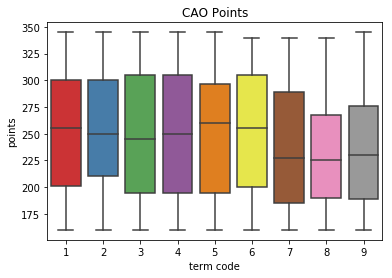

CAO                                                           \
            count unique top freq first last        mean        std    min   
Study_Mode                                                                   
full time   791.0    NaN NaN  NaN   NaN  NaN  247.793932  56.029213  160.0   
part time   182.0    NaN NaN  NaN   NaN  NaN  249.642857  57.582599  160.0   
remote       27.0    NaN NaN  NaN   NaN  NaN  262.407407  58.922543  165.0   

                  ...  progressed                                           \
              25% ...        freq first last mean  std  min  25%  50%  75%   
Study_Mode        ...                                                        
full time   195.0 ...         604   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
part time   200.0 ...         135   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
remote      202.5 ...          23   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                 
            max  
Study_Mode       
full time   NaN  
part time   NaN  
remote      NaN  

[3 rows x 104 columns]

In [24]:
##sns.pairplot(df)
sns.boxplot(x = 'pref', y = 'CAO', data = df, palette="Set1").set_title("CAO Points")
##plt.legend()
plt.ylabel('points')
plt.xlabel('term code') # title of the x axis
plt.show()
df.groupby("Study_Mode").describe(include='all') 


### Section Six - references and conclusion

[HEA](http://hea.ie/)

[HEA PROGRESSION](http://hea.ie/assets/uploads/2018/09/HEA-Progression-Higher-Ed-201415-201516.pdf)


https://en.wikipedia.org/wiki/Benford%27s_law

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html ##describe 

[1] [programming & Scripting project 2018](https://github.com/Hudsonsue/GMIT-project-2018-programming-scripting)
[2][stackoverflow save to file](https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal)
[3][stackoverflow random dates](https://stackoverflow.com/questions/41006182/generate-random-dates-within-a-range-in-numpy)

### END